In [3]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import pandas as pd

In [19]:
#Download data for multiple stocks like Apple, Microsoft, Tesla
tickers = ['AAPL', 'MSFT', 'TSLA']
start_date = '2010-01-01'
end_date = '2025-01-01'

In [21]:
#Download data from Yahoo Finance
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

#Combine data into a single DataFrame
df=pd.concat(data.values(), keys=data.keys(), names=['Ticker', 'Date'])

#Display the first few rows
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                 Close      High       Low      Open       Volume Close  \
Ticker                 AAPL      AAPL      AAPL      AAPL         AAPL  MSFT   
Ticker Date                                                                    
AAPL   2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600.0   NaN   
       2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800.0   NaN   
       2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000.0   NaN   
       2010-01-07  6.337110  6.379844  6.291067  6.372320  477131200.0   NaN   
       2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800.0   NaN   

Price             High  Low Open Volume Close High  Low Open Volume  
Ticker            MSFT MSFT MSFT   MSFT  TSLA TSLA TSLA TSLA   TSLA  
Ticker Date                                                          
AAPL   2010-01-04  NaN  NaN  NaN    NaN   NaN  NaN  NaN  NaN    NaN  
       2010-01-05  NaN  NaN  NaN    NaN   NaN  NaN  NaN  NaN    NaN  
       20

In [23]:
#Checking for missing values
missing_data = df.isnull().sum()

#Filling missing values using forward fill method
df.fillna(method='ffill', inplace = True)

#Check for any remaining missing values
print(df.isnull().sum())

Price   Ticker
Close   AAPL         0
High    AAPL         0
Low     AAPL         0
Open    AAPL         0
Volume  AAPL         0
Close   MSFT      3774
High    MSFT      3774
Low     MSFT      3774
Open    MSFT      3774
Volume  MSFT      3774
Close   TSLA      7548
High    TSLA      7548
Low     TSLA      7548
Open    TSLA      7548
Volume  TSLA      7548
dtype: int64


C:\Users\test\AppData\Local\Temp\ipykernel_22740\2731419823.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace = True)


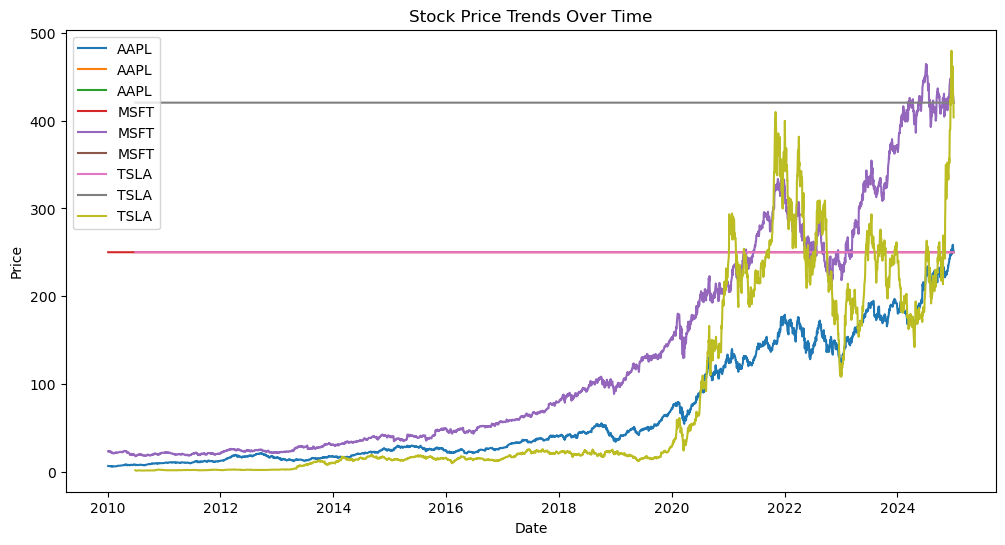

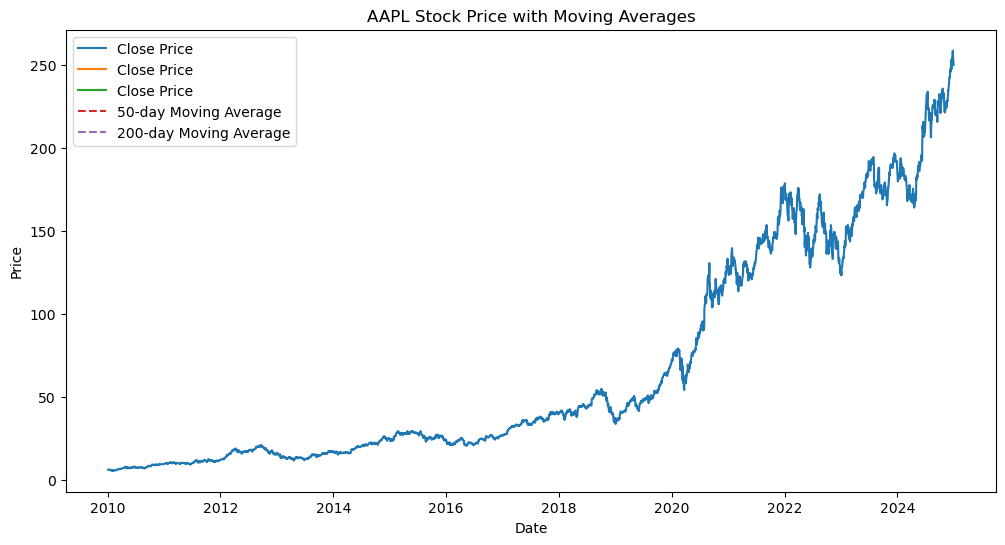

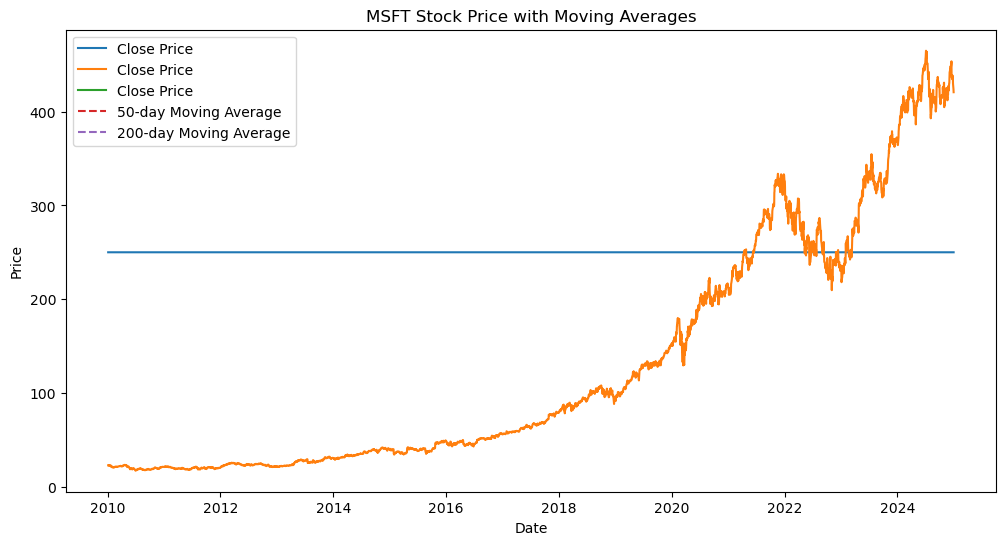

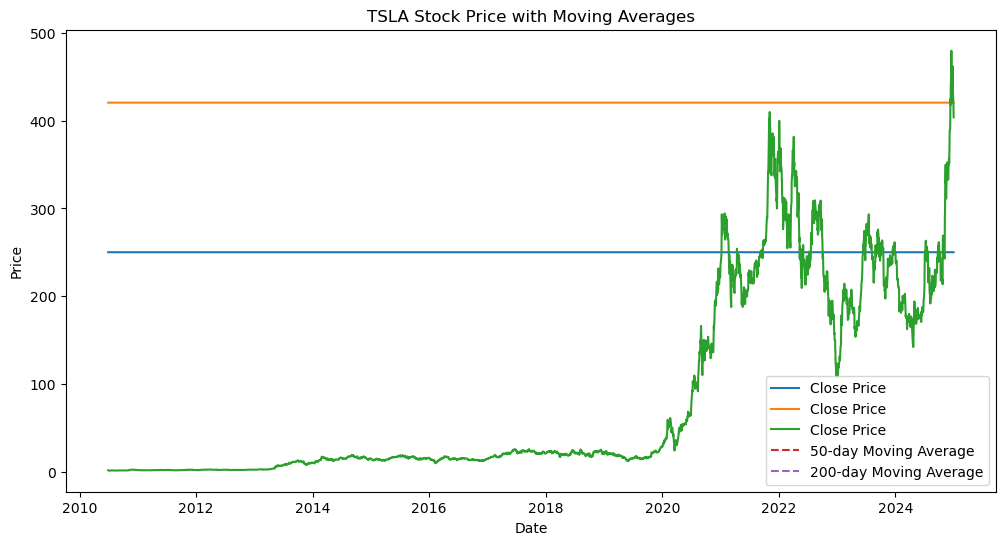

In [25]:
#Exploratory Data Analysis(EDA)
import matplotlib.pyplot as plt
import seaborn as sns

#Plot closing price of all stocks
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(df.loc[ticker, 'Close'], label=ticker)
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Plot 50-day and 200-day moving averages
for ticker in tickers:
    df.loc[ticker, 'MA50'] = df.loc[ticker, 'Close'].rolling(window=50).mean()
    df.loc[ticker, 'MA200'] = df.loc[ticker, 'Close'].rolling(window=200).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(df.loc[ticker, 'Close'], label='Close Price')
    plt.plot(df.loc[ticker, 'MA50'], label='50-day Moving Average', linestyle='--')
    plt.plot(df.loc[ticker, 'MA200'], label='200-day Moving Average', linestyle='--')
    plt.title(f'{ticker} Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


C:\Users\test\AppData\Local\Temp\ipykernel_22740\1595699481.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change()


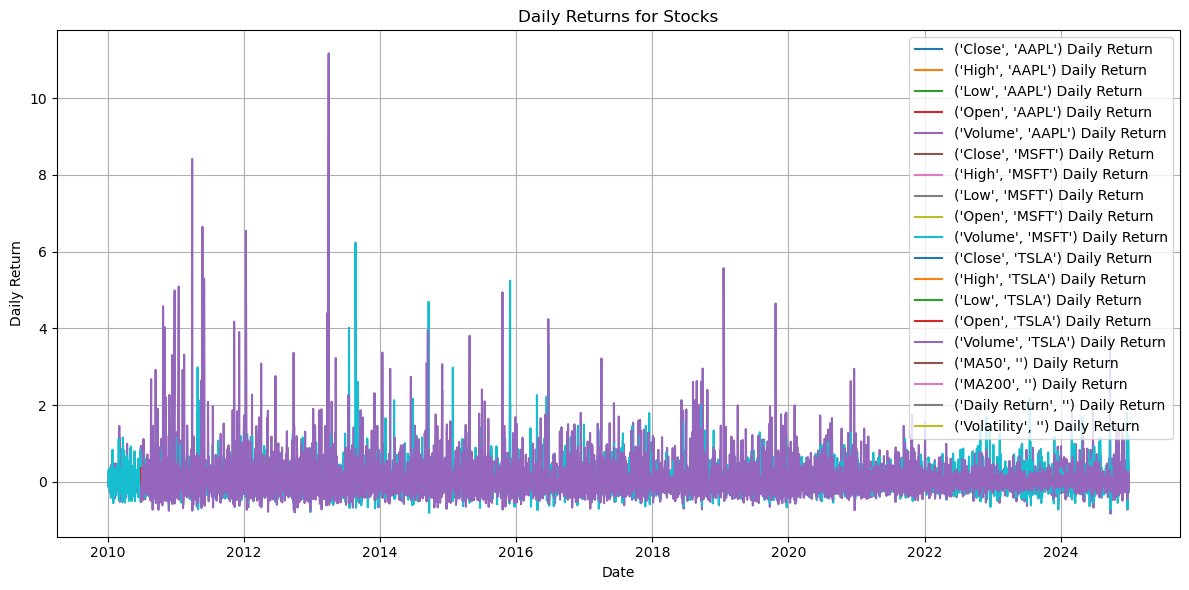

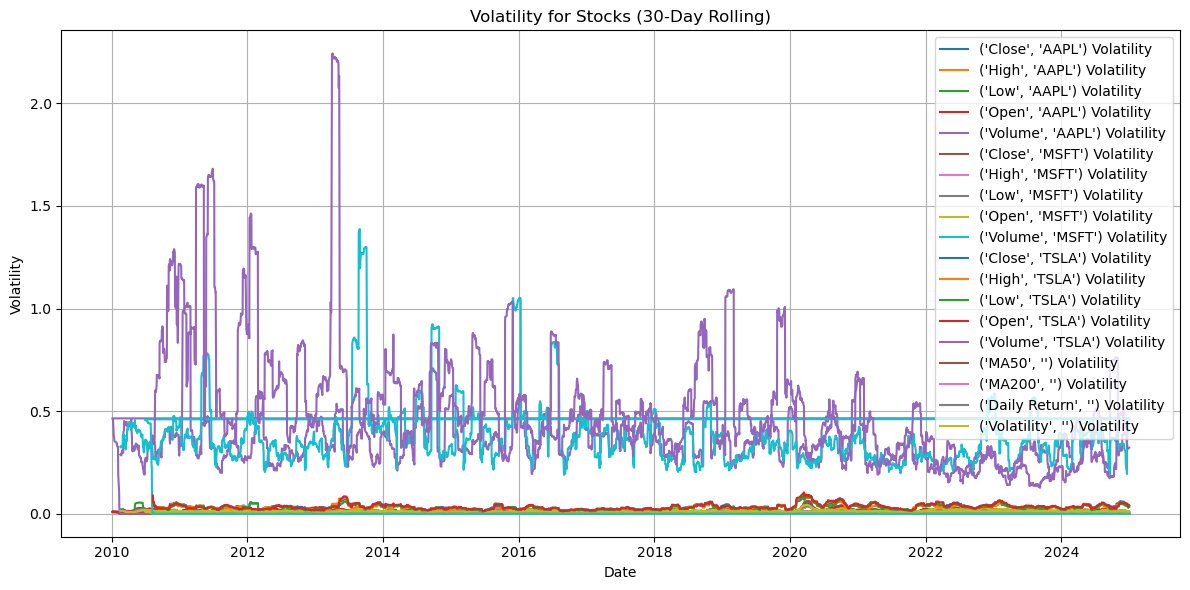

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the index is datetime if it isn't already
if not isinstance(df.index, pd.DatetimeIndex):
    # Assuming the DataFrame is in a "wide format" where Date is a column
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime
        df.set_index('Date', inplace=True)  # Set 'Date' as the new index
    else:
        # If the index is already a MultiIndex and Date is the second level, convert it
        df.index = pd.to_datetime(df.index.get_level_values('Date'))

# Calculate daily returns for each ticker
daily_returns = df.pct_change()

# Calculate rolling volatility (30-day standard deviation)
volatility = daily_returns.rolling(window=30).std()

# Plot Daily Returns
plt.figure(figsize=(12, 6))
for ticker in df.columns:
    plt.plot(daily_returns.index, daily_returns[ticker], label=f'{ticker} Daily Return')
plt.title('Daily Returns for Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Volatility (30-day rolling)
plt.figure(figsize=(12, 6))
for ticker in df.columns:
    plt.plot(volatility.index, volatility[ticker], label=f'{ticker} Volatility')
plt.title('Volatility for Stocks (30-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Engineering for Machine Learning Models
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

# Add the volatility feature, which is already calculated
df['Volatility'] = volatility.mean(axis=1)  # Mean volatility across tickers

# Check the first few rows to ensure the features are added
print(df[['Year', 'Month', 'Day', 'Volatility']].head())


Price       Year Month Day Volatility
Ticker                               
Date                                 
2010-01-04  2010     1   4        NaN
2010-01-05  2010     1   5        NaN
2010-01-06  2010     1   6        NaN
2010-01-07  2010     1   7        NaN
2010-01-08  2010     1   8        NaN


In [51]:
# Ensure there are no missing values in X and y
df_cleaned = df[['Close', 'Year', 'Month', 'Day', 'Volatility']].dropna()

# Separate the features and target variable
X = df_cleaned[['Year', 'Month', 'Day', 'Volatility']]
y = df_cleaned['Close']

# Check that the lengths match
print(f"Length of X: {X.shape[0]}, Length of y: {y.shape[0]}")


Length of X: 3652, Length of y: 3652


In [53]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of training and testing sets
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set shape: X_train = (2921, 4), y_train = (2921, 3)
Testing set shape: X_test = (731, 4), y_test = (731, 3)


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Train the Random Forest Model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Random Forest): {mae_rf}")


Mean Absolute Error (Random Forest): 24.512531963510096


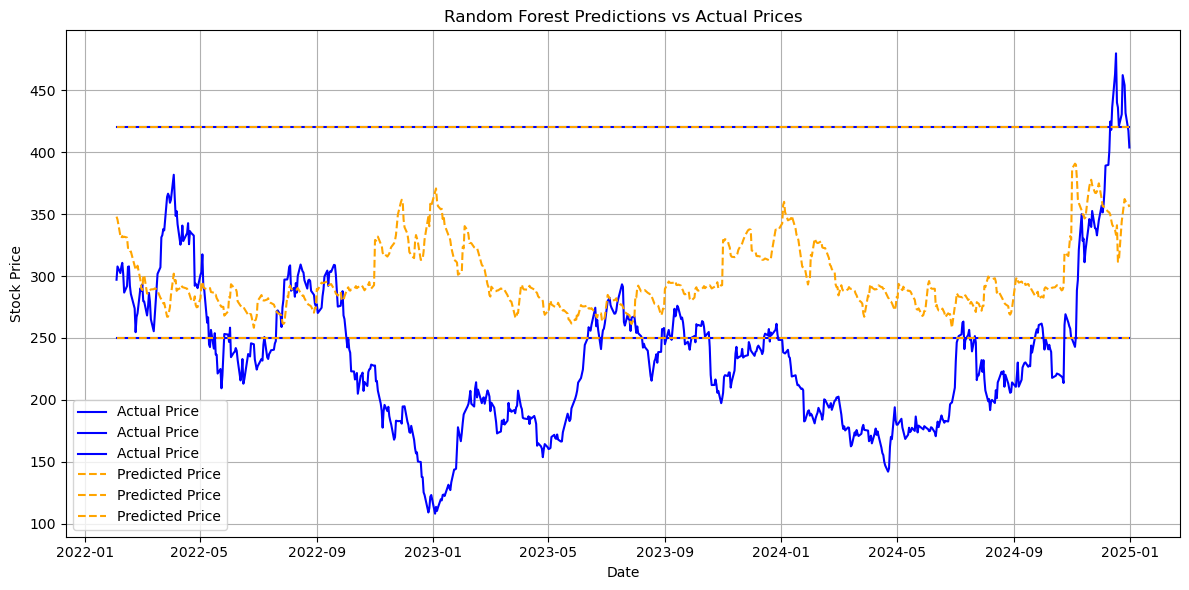

In [ ]:
# Visualize Predictions vs Actual Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='orange', linestyle='--')
plt.title('Random Forest Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Further Model Evaluation Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R² Score: {r2_rf}")


Root Mean Squared Error (RMSE): 51.20829192754796
R² Score: 0.2573304700139885
